In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"narongkim","key":"57c1a676139900d7de905ec9b299b7d5"}'}

In [ ]:
!ls -al
!mkdir -p ~/.kaggle
!ls -al ~/

total 20
drwxr-xr-x 1 root root 4096 Dec  4 02:04 .
drwxr-xr-x 1 root root 4096 Dec  4 02:02 ..
drwxr-xr-x 4 root root 4096 Dec  1 20:07 .config
-rw-r--r-- 1 root root   65 Dec  4 02:04 kaggle.json
drwxr-xr-x 1 root root 4096 Dec  1 20:08 sample_data
total 64
drwx------ 1 root root 4096 Dec  4 02:04 .
drwxr-xr-x 1 root root 4096 Dec  4 02:02 ..
-r-xr-xr-x 1 root root 1169 Jan  1  2000 .bashrc
drwxr-xr-x 1 root root 4096 Dec  1 20:25 .cache
drwx------ 4 root root 4096 Dec  1 20:24 .config
drwxr-xr-x 5 root root 4096 Dec  1 20:23 .ipython
drwx------ 2 root root 4096 Dec  1 20:23 .jupyter
drwxr-xr-x 2 root root 4096 Dec  4 02:04 .kaggle
drwxr-xr-x 2 root root 4096 Dec  1 20:20 .keras
drwxr-xr-x 1 root root 4096 Dec  1 20:23 .local
drwxr-xr-x 4 root root 4096 Dec  1 20:24 .npm
-rw-r--r-- 1 root root  148 Aug 17  2015 .profile
-r-xr-xr-x 1 root root  254 Jan  1  2000 .tmux.conf
-rw-r--r-- 1 root root  165 Dec  1 20:23 .wget-hsts


In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!ls -al ~/.kaggle/

total 16
drwxr-xr-x 2 root root 4096 Dec  4 02:04 .
drwx------ 1 root root 4096 Dec  4 02:04 ..
-rw------- 1 root root   65 Dec  4 02:04 kaggle.json


In [ ]:
!kaggle datasets download -d neha1703/movie-genre-from-its-poster

 70% 25.0M/35.9M [00:00<00:00, 25.3MB/s]
100% 35.9M/35.9M [00:00<00:00, 40.1MB/s]


In [ ]:
!unzip movie-genre-from-its-poster.zip
!ls

Archive:  movie-genre-from-its-poster.zip
  inflating: MovieGenre.csv          
  inflating: SampleMoviePosters/SampleMoviePosters/10040.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10057.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10071.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10155.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10195.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10208.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10247.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10267.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10281.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10307.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10323.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10418.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10726.jpg  
  inflating: SampleMoviePosters/SampleMoviePosters/10747.jpg  
  inflating: SampleMoviePosters/Sample

In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import skimage
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from collections import OrderedDict
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import pandas as pd
movies = pd.read_csv('//content/MovieGenre.csv', encoding="ISO-8859-1").fillna("")
movies.head()

,imdbId,Imdb Link,Title,IMDB Score,Genre,Poster
0,114709,http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...
1,113497,http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...
2,113228,http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...
3,114885,http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...
4,113041,http://www.imdb.com/title/tt113041,Father of the Bride Part II (1995),5.9,Comedy|Family|Romance,https://images-na.ssl-images-amazon.com/images...


In [ ]:
# image download

import urllib.request

import os

# os.mkdir("/content/images")  # 폴더 생성

not_found = []

def downImage(img_url, img_name):
  try :
    dir = '/content/images/'
    urllib.request.urlretrieve(img_url, dir + str(img_name) + '.jpg')
  except : 
    # print(img_url, img_name)
    not_found.append(img_name)

for idx in movies.index:
  img_url = movies.loc[idx, 'Poster']
  img_name = movies.loc[idx, 'imdbId']
  downImage(img_url, img_name)

len(not_found)

3939

In [ ]:
# #image download _ zip file
# from google.colab import files
# files.upload()

# !unzip images.zip

KeyboardInterrupt: ignored

In [ ]:
# NaN이 잘 안되므로, 이미지 없는 파일들과 장르 없는 파일들의 행 모두 삭제
import os
image_path = '/content/content/images/'
file_list = os.listdir(image_path)
file_list_jpg = [file for file in file_list if file.endswith(".jpg")]

not_found = []
for idx in movies.index:
  file_name = str(movies.at[idx,'imdbId'])
  if file_name + '.jpg' not in file_list_jpg:
    not_found.append(idx)

print(not_found[0:5])

[7, 25, 29, 38, 45]


In [ ]:
len(not_found)

3939

In [ ]:
movies = movies.drop(not_found)

In [ ]:
id_genre_dict = {}
no_genre_list = []
for idx in movies.index:
  movie_id = movies.at[idx, 'imdbId']
  gen_split = movies.at[idx, 'Genre'].split('|')
  if gen_split == ['']:
    no_genre_list.append(idx)
  id_genre_dict.update({movie_id : gen_split})

[print(v) for i, v in enumerate(id_genre_dict.items()) if i < 10]

(114709, ['Animation', 'Adventure', 'Comedy'])
(113497, ['Action', 'Adventure', 'Family'])
(113228, ['Comedy', 'Romance'])
(114885, ['Comedy', 'Drama', 'Romance'])
(113041, ['Comedy', 'Family', 'Romance'])
(113277, ['Action', 'Crime', 'Drama'])
(114319, ['Comedy', 'Drama'])
(114576, ['Action', 'Crime', 'Thriller'])
(113189, ['Action', 'Adventure', 'Thriller'])
(112346, ['Comedy', 'Drama', 'Romance'])


[None, None, None, None, None, None, None, None, None, None]

In [ ]:
print(no_genre_list[:5])

[811, 1509, 4667, 5469, 7947]


In [ ]:
movies = movies.drop(no_genre_list)

In [ ]:
genres = id_genre_dict.values()
genres = [item for sublist in genres for item in sublist]
genres = set(genres)
genres = list(genres)
genres.remove('')
# genres.remove('Genre')
genres.sort()

genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [ ]:
multi_hot_y = []

for idx in movies.index:
  i = movies.loc[idx, 'imdbId']
  y_i = np.zeros(len(genres))
  gens = id_genre_dict[i]
  for g in gens:
    if g == '':
      y_i = None
      break
    y_i[genres.index(g)] = 1
  multi_hot_y.append(y_i)
  

print(multi_hot_y[:10])

[array([0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0

In [ ]:
len(multi_hot_y)

36053

36053
64
64
3


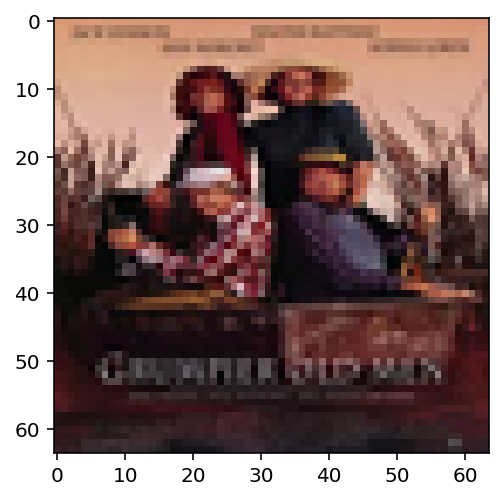

In [ ]:
image_path = '/content/content/images/'
original_images = []
images = []

def preprocessingImage (image):
  image_resized = image.resize((64, 64))
  image_p = np.asarray(image_resized)
  return image_p

for i in movies['imdbId']:
    # if i in not_found:
    #   original_images.append(np.NaN)
    #   images.append(np.NaN)
    #   continue
    try: 
      file = image_path+str(i)+'.jpg'
      image = Image.open(file).convert('RGB')

      original_images.append(image)
      result_p = preprocessingImage(image)
      images.append(result_p)
    except: 
      original_images.append(None)
      images.append(None)



print(len(images))
print(len(images[0]))
print(len(images[0][0]))
print(len(images[0][0][0]))
plt.imshow(images[2])

In [ ]:
from sklearn.model_selection import train_test_split
images = np.array(images)
multi_hot_y = np.array(multi_hot_y)
X_train, X_test, y_train, y_test = train_test_split(images, multi_hot_y, random_state=128, test_size=0.1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 60, 16)        1216      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 30, 30, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        12832     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 32)       

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/10
254/254 [==============================] - 167s 653ms/step - loss: 0.6227 - binary_accuracy: 0.8569 - val_loss: 0.2831 - val_binary_accuracy: 0.9221
Epoch 2/10
254/254 [==============================] - 164s 647ms/step - loss: 0.2560 - binary_accuracy: 0.9189 - val_loss: 0.2335 - val_binary_accuracy: 0.9221
Epoch 3/10
254/254 [==============================] - 166s 654ms/step - loss: 0.2400 - binary_accuracy: 0.9224 - val_loss: 0.2229 - val_binary_accuracy: 0.9225
Epoch 4/10
254/254 [==============================] - 165s 649ms/step - loss: 0.2325 - binary_accuracy: 0.9229 - val_loss: 0.2165 - val_binary_accuracy: 0.9224
Epoch 5/10
254/254 [==============================] - 164s 647ms/step - loss: 0.2286 - binary_accuracy: 0.9230 - val_loss: 0.2156 - val_binary_accuracy: 0.9224
Epoch 6/10
254/254 [==============================] - 164s 646ms/step - loss: 0.2260 - binary_accuracy: 0.9233 - val_loss: 0.2152 - val_binary_accuracy: 0.9227
Epoch 7/10
254/254 [====================

In [ ]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.925, Test: 0.924


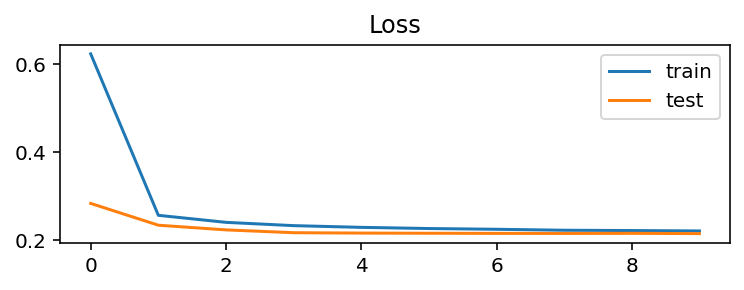

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

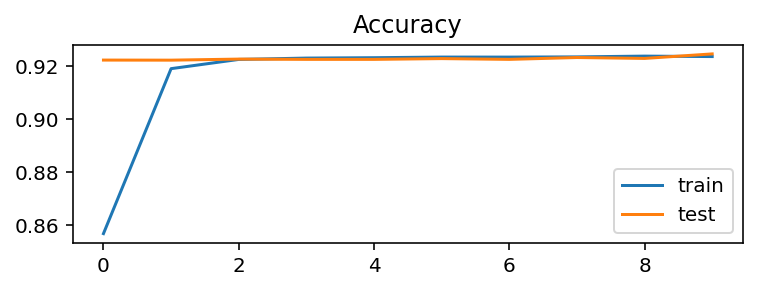

In [ ]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['binary_accuracy'], label='train')
plt.plot(history.history['val_binary_accuracy'], label='test')
plt.legend()
plt.show()